<a href="https://colab.research.google.com/github/KhosrojerdiA/Machine-Learning/blob/main/LSTM_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

#Data

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
df.head()

13568290/13568290 [==============================] - 2s 0us/step


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


##Inexing

In [ ]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


##Plot one variable

<Axes: xlabel='Date Time'>

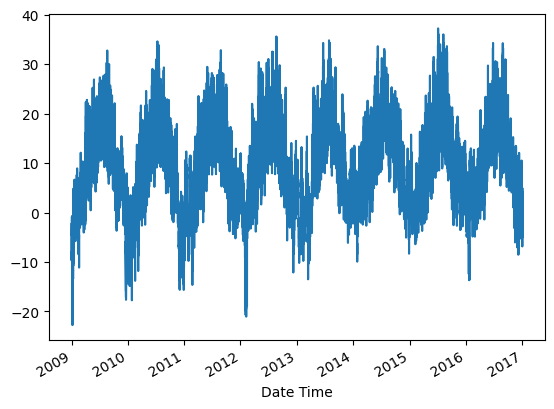

In [ ]:
temp = df['T (degC)']
temp.plot()

#Model 1

##Window

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

#X1 array([[[-8.05],
#        [-8.88],
#        [-8.81],
#       [-9.05],
#        [-9.63]],

#[[-8.88],
#        [-8.81],
#        [-9.05],
#        [-9.63],
#        [-9.67]],

#y1 array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

((70086, 5, 1), (70086,))

##Split train, val and test

In [ ]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

##Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 37.4882 - root_mean_squared_error: 6.1228 - val_loss: 1.7427 - val_root_mean_squared_error: 1.3201
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 3.2681 - root_mean_squared_error: 1.8078 - val_loss: 0.8430 - val_root_mean_squared_error: 0.9182
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.2364 - root_mean_squared_error: 1.1119 - val_loss: 0.5655 - val_root_mean_squared_error: 0.7520
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7989 - root_mean_squared_error: 0.8938 - val_loss: 0.5334 - val_root_mean_squared_error: 0.7303
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7065 - root_mean_squared_error: 0.8405 - val_loss: 0.5349 - val_root_mean_squared_error: 0.7314
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6773 - root_mean_squared_error: 0.8230 - val_

##Load

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

##Train Prediction

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 [==============================] - 5s 2ms/step


,Train Predictions,Actuals
0,-9.781626,-9.67
1,-9.572439,-9.17
2,-8.644335,-8.10
3,-7.149919,-7.66
4,-7.112699,-7.04
...,...,...
59995,6.011508,6.07
59996,7.306346,9.88
59997,12.279499,13.53
59998,16.222130,15.43


###Plot

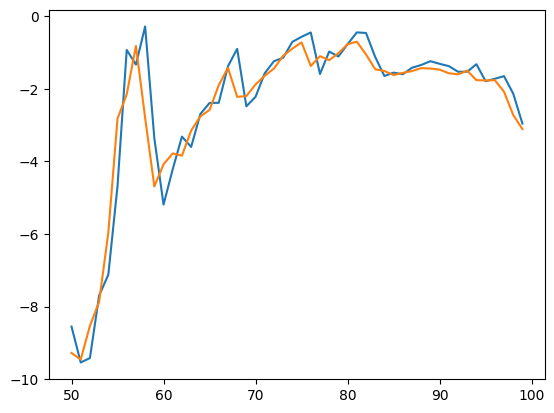

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

##Validation Prediction

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,15.514612,14.02
1,13.263956,13.67
2,13.065097,12.27
3,11.524179,11.19
4,10.379440,10.85
...,...,...
4995,17.401060,18.27
4996,17.439541,17.85
4997,17.268940,16.65
4998,15.894320,15.85


###Plot

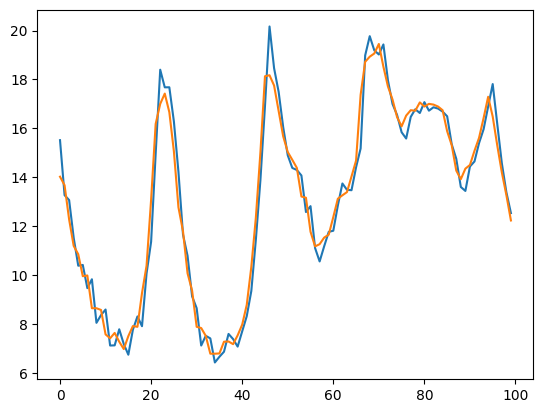

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

##Test Prediction

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,14.438116,13.99
1,13.266762,13.46
2,12.888984,12.93
3,12.504955,12.43
4,12.048614,12.17
...,...,...
5081,-0.850799,-0.98
5082,-1.365330,-1.40
5083,-1.709388,-2.75
5084,-3.103221,-2.89


###Plot

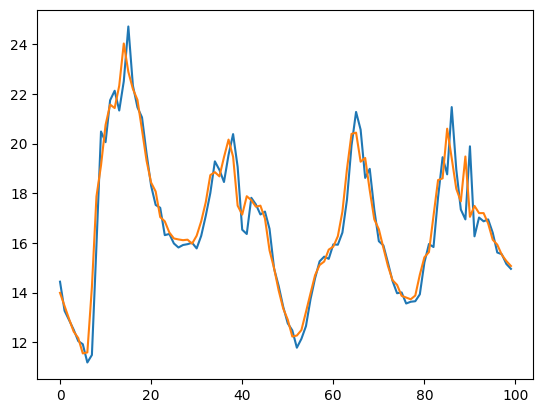

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

#Plot Function

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

##Apply to test

159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.438116    13.99
 1       13.266762    13.46
 2       12.888984    12.93
 3       12.504955    12.43
 4       12.048614    12.17
 ...           ...      ...
 5081    -0.850799    -0.98
 5082    -1.365330    -1.40
 5083    -1.709388    -2.75
 5084    -3.103221    -2.89
 5085    -3.137678    -3.93
 
 [5086 rows x 2 columns],
 0.617058522666734)

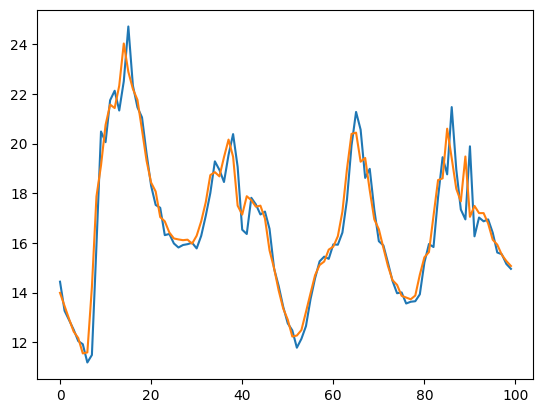

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

#Model 2

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 8.6093 - root_mean_squared_error: 2.9342 - val_loss: 1.2954 - val_root_mean_squared_error: 1.1382
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.3331 - root_mean_squared_error: 1.1546 - val_loss: 0.8104 - val_root_mean_squared_error: 0.9002
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8960 - root_mean_squared_error: 0.9466 - val_loss: 0.5930 - val_root_mean_squared_error: 0.7700
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7504 - root_mean_squared_error: 0.8662 - val_loss: 0.5551 - val_root_mean_squared_error: 0.7450
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7164 - root_mean_squared_error: 0.8464 - val_loss: 0.5544 - val_root_mean_squared_error: 0.7446
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7069 - root_mean_squared_error: 0.8408 - val_loss: 

#Model 3

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 36.2062 - root_mean_squared_error: 6.0172 - val_loss: 1.3187 - val_root_mean_squared_error: 1.1483
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.2935 - root_mean_squared_error: 1.5144 - val_loss: 0.6659 - val_root_mean_squared_error: 0.8160
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9604 - root_mean_squared_error: 0.9800 - val_loss: 0.5352 - val_root_mean_squared_error: 0.7316
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7220 - root_mean_squared_error: 0.8497 - val_loss: 0.5114 - val_root_mean_squared_error: 0.7152
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6687 - root_mean_squared_error: 0.8177 - val_loss: 0.4986 - val_root_mean_squared_error: 0.7061
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6518 - root_mean_squared_error: 0.8074 - val_

#Model 4 (add more variables)

##Seconds

In [ ]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [ ]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [ ]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


##Window 2

In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

##Split

In [ ]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

##Preprocess

In [ ]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

##Model

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 28.6517 - root_mean_squared_error: 5.3527 - val_loss: 3.6326 - val_root_mean_squared_error: 1.9059
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 3.9763 - root_mean_squared_error: 1.9941 - val_loss: 2.0960 - val_root_mean_squared_error: 1.4477
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.9296 - root_mean_squared_error: 1.3891 - val_loss: 1.0143 - val_root_mean_squared_error: 1.0071
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0018 - root_mean_squared_error: 1.0009 - val_loss: 0.6833 - val_root_mean_squared_error: 0.8266
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7277 - root_mean_squared_error: 0.8531 - val_loss: 0.5253 - val_root_mean_squared_error: 0.7248
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6052 - root_mean_squared_error: 0.7779 - val_

##Plot test

159/159 [==============================] - 1s 3ms/step


(      Predictions  Actuals
 0       13.373727    13.46
 1       12.974273    12.93
 2       12.590657    12.43
 3       12.289213    12.17
 4       12.390439    11.55
 ...           ...      ...
 5080    -0.857988    -0.98
 5081    -1.175379    -1.40
 5082    -1.451960    -2.75
 5083    -2.783974    -2.89
 5084    -2.822327    -3.93
 
 [5085 rows x 2 columns],
 0.5082326532191153)

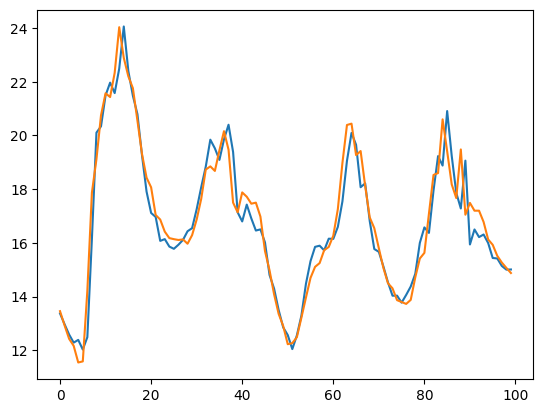

In [ ]:
plot_predictions1(model4, X2_test, y2_test)

#Model 5 (add p (mbar) )

In [ ]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


##Window 3

In [ ]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

##Split

In [ ]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

##Preprocess

In [ ]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [ ]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

##Model

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.1826 - root_mean_squared_error: 0.4273 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1791
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0237 - root_mean_squared_error: 0.1541 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0111 - root_mean_squared_error: 0.1056 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0913
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0077 - root_mean_squared_error: 0.0880 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0063 - root_mean_squared_error: 0.0793 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0682
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_l

#Plot Function 2

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

159/159 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.401424,0.412451,-0.786212,-0.793439
1,0.360514,0.353683,-0.776794,-0.763123
2,0.325001,0.323123,-0.743882,-0.721893
3,0.332578,0.250251,-0.693330,-0.652773
4,0.290449,0.254952,-0.610410,-0.652773
...,...,...,...,...
95,0.689543,0.716869,-0.416259,-0.416310
96,0.652358,0.687485,-0.417509,-0.399333
97,0.637483,0.663978,-0.399533,-0.399333
98,0.643738,0.641646,-0.391192,-0.400546


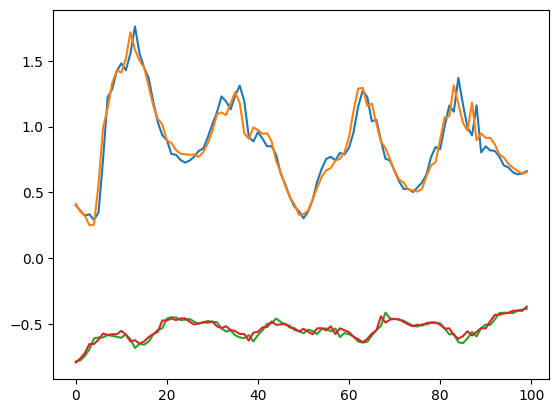

In [ ]:
plot_predictions2(model5, X3_test, y3_test)

#Model 6

##Preprocess

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

##Plot Function 2 - 2

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

159/159 [==============================] - 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.836184,12.93,982.489624,982.43
1,12.488125,12.43,982.567261,982.68
2,12.185972,12.17,982.838684,983.02
3,12.250444,11.55,983.255554,983.59
4,11.892011,11.59,983.939392,983.59
...,...,...,...,...
95,15.287507,15.52,985.540466,985.54
96,14.971138,15.27,985.530151,985.68
97,14.844581,15.07,985.678406,985.68
98,14.897799,14.88,985.747192,985.67


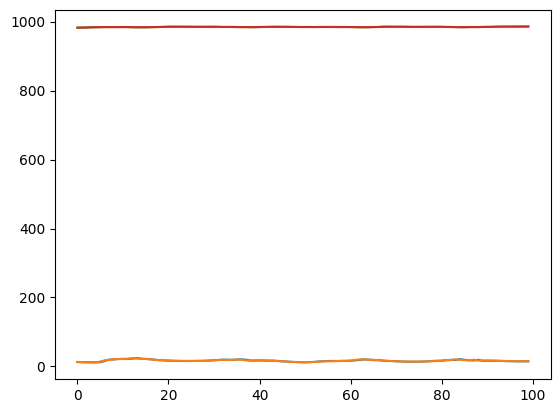

In [ ]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

##Start and End

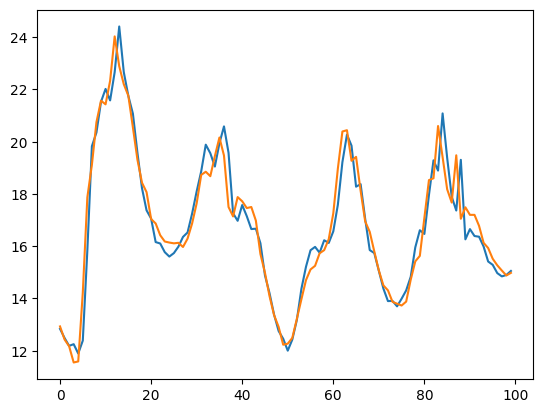

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

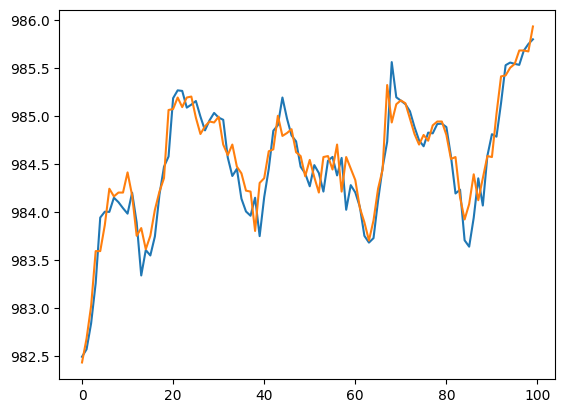

In [ ]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

##Model

In [ ]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 [==============================] - 25s 11ms/step - loss: 0.1417 - root_mean_squared_error: 0.3765 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2043
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0328 - root_mean_squared_error: 0.1810 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0170 - root_mean_squared_error: 0.1303 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1107
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0930
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0087 - root_mean_squared_error: 0.0933 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0071 - root_mean_squared_error: 0.0844 - va

#Model 7

In [ ]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 8)                 3080      
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1094 - root_mean_squared_error: 0.3307 - val_loss: 0.0197 - val_root_mean_